# Time-Frequency Analysis with the Gabor Window

## Problem

The Gabor window is a Gaussian function commonly used in signal processing for time-frequency analysis. It is defined in the time domain by the expression:

$$
w(t) = \frac{1}{2\sqrt{\pi \alpha}} \exp\left(-\frac{(t - \beta)^2}{4\alpha}\right),
$$

where $\alpha > 0$ determines the width of the window and $\beta$ its position in time.

Consider a time interval from $t = -10$ to $t = 10$ sampled with 1000 equally spaced points, and a sampling frequency of $f_s = 20$ Hz. Use this information to define a corresponding frequency vector ranging from $-f_s/2$ to $f_s/2$.

For the values $\alpha = \frac{1}{64}$, $\frac{1}{2}$, and $4$, and $\beta = -2$, $0$, and $4$, compute the Gabor window $gw(t)$ and normalize it so that its maximum value is 1. Then, calculate the magnitude of its Fourier Transform and normalize it as well. Finally, plot the Gabor windows in the time domain and their respective magnitude spectra in the frequency domain using subplots arranged by $\alpha$ and $\beta$ values.

## Solution

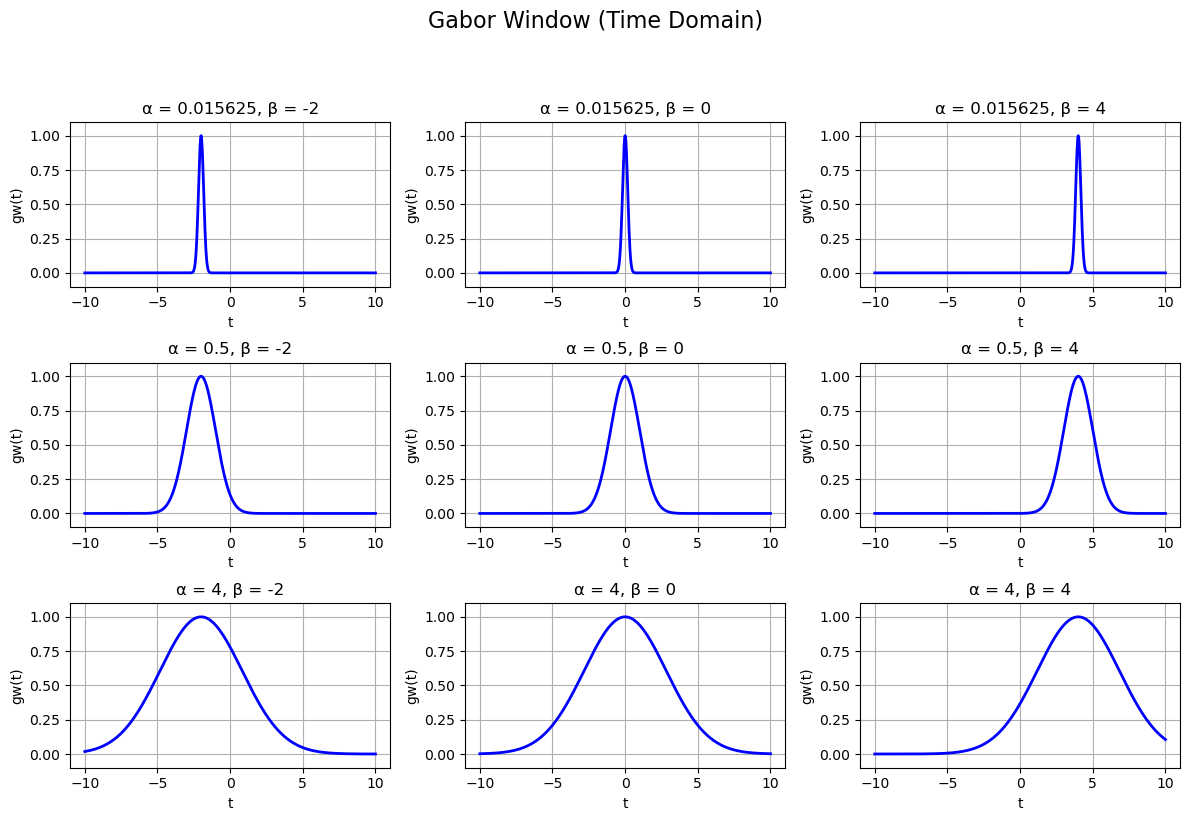

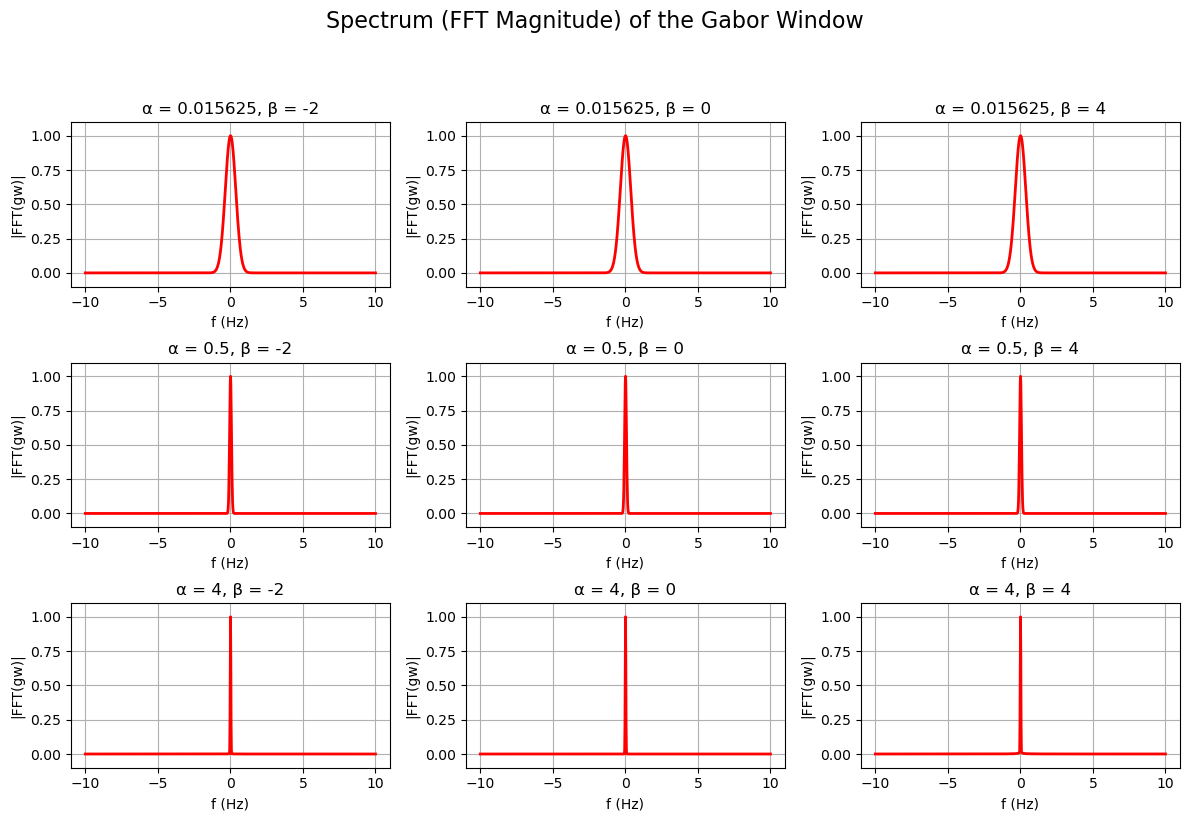

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t = np.linspace(-10, 10, 1000)  # Time range
fs = 20  # Sampling frequency (in Hz)
f = np.linspace(-fs / 2, fs / 2, 1000)  # Frequency range centered at 0

# Define values of alpha and beta
alpha_values = [1/64, 1/2, 4]  # Different alpha values
beta_values = [-2, 0, 4]  # Different beta values

# Figure: Window in the time domain
fig1, axs1 = plt.subplots(len(alpha_values), len(beta_values), figsize=(12, 8))
fig1.suptitle('Gabor Window (Time Domain)', fontsize=16, y=1.02)

for i, alpha in enumerate(alpha_values):
    for j, beta in enumerate(beta_values):
        # Gaussian function in the time domain
        gw = np.exp(-(t - beta)**2 / (4 * alpha)) * (1 / (2 * np.sqrt(np.pi * alpha)))
        gw /= np.max(gw)

        axs1[i, j].plot(t, gw, color='blue', linewidth=2)
        axs1[i, j].set_title(f'α = {alpha}, β = {beta}')
        axs1[i, j].set_xlabel('t')
        axs1[i, j].set_ylabel('gw(t)')
        axs1[i, j].set_ylim(-0.1, 1.1)
        axs1[i, j].grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# Figure: FFT
fig2, axs2 = plt.subplots(len(alpha_values), len(beta_values), figsize=(12, 8))
fig2.suptitle('Spectrum (FFT Magnitude) of the Gabor Window', fontsize=16, y=1.02)

for i, alpha in enumerate(alpha_values):
    for j, beta in enumerate(beta_values):
        # Gaussian function in the time domain
        gw = np.exp(-(t - beta)**2 / (4 * alpha)) * (1 / (2 * np.sqrt(np.pi * alpha)))
        gw /= np.max(gw)

        gw_fft = np.fft.fft(gw)
        gw_fft = np.fft.fftshift(gw_fft)
        gw_fft_mag = np.abs(gw_fft)
        gw_fft_mag /= np.max(gw_fft_mag)

        axs2[i, j].plot(f, gw_fft_mag, color='red', linewidth=2)
        axs2[i, j].set_title(f'α = {alpha}, β = {beta}')
        axs2[i, j].set_xlabel('f (Hz)')
        axs2[i, j].set_ylabel('|FFT(gw)|')
        axs2[i, j].set_ylim(-0.1, 1.1)
        axs2[i, j].grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**Time-Frequency Analysis with Gabor Windows**

Different combinations of the parameters $\alpha$ and $\beta$ were analyzed using the function `gabor_2(alpha, beta)`. The parameter $\alpha$ controls the width of the Gabor window (and thus the trade-off between time and frequency resolution), while $\beta$ represents the temporal center of the window.

The values used were:

- $\alpha = \frac{1}{4}, \frac{1}{16}, \frac{1}{64}$
- $\beta = 0,\ 0.5,\ 1.0,\ 1.5$

**Observations**:

- For large values of $\alpha$ (wide windows), good frequency resolution is achieved but with poor time resolution. This results in the spectrum of the signal*window product showing contributions from multiple frequencies simultaneously.
- For small values of $\alpha$ (narrow windows), better temporal localization is obtained. In this case, centering the window at $t = 0.5$ primarily captures the 32 Hz component, while centering it at $t = 1.5$ reveals the 8 Hz component.
- The best combination for isolating **a single frequency at a time** is using $\alpha = \frac{1}{64}$ with $\beta$ values close to the intervals where each sinusoidal component occurs.

This analysis demonstrates how the Gabor transform enables the study of the spectral evolution of non-stationary signals.